<a href="https://colab.research.google.com/github/likeshd/Bike-Rental-System/blob/master/attrition_rate_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\people (14).csv", sep=",")

In [ ]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
##Data Preprocessing -

In [ ]:
#Identifying the null values/ missing values in the dataset (Nan)

In [ ]:
#isnull
df.isnull()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#Check if any duplicate records /rows are present in the dataset
#df.duplicated()

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995    False
14996    False
14997    False
14998    False
Length: 14999, dtype: bool

In [ ]:
df.duplicated().sum()

3008

In [ ]:
df.shape

(14999, 10)

In [ ]:
df = df.drop_duplicates() #14999 - 3008 ==> 11991

In [ ]:
df.shape

(11991, 10)

In [ ]:
#Data Correlation -

#Positive Correlation - directly proportional
#Negative Correlation - inversly proportional
#Zero correlation - Not related to each other --> ex: Age, Gender

In [ ]:
df[["satisfactoryLevel","numberOfProjects"]].corr()

,satisfactoryLevel,numberOfProjects
satisfactoryLevel,1.000000,-0.133246
numberOfProjects,-0.133246,1.000000


In [ ]:
df.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

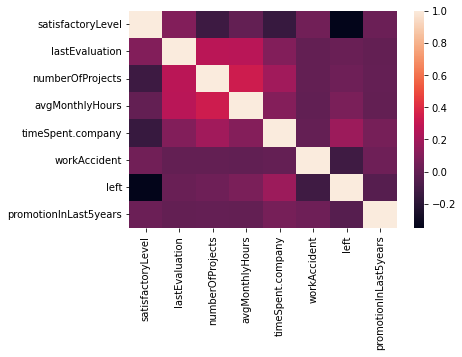

In [ ]:
sns.heatmap(df.corr())

<AxesSubplot:>

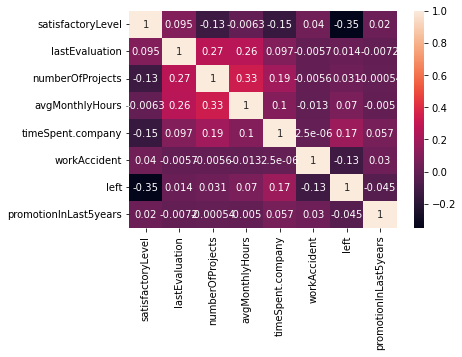

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [ ]:
a = ['dept','numberOfProjects','timeSpent.company','workAccident','promotionInLast5years','salary']

In [ ]:
a

['dept',
 'numberOfProjects',
 'timeSpent.company',
 'workAccident',
 'promotionInLast5years',
 'salary']

In [ ]:
for i in a:
    print(i)

dept
numberOfProjects
timeSpent.company
workAccident
promotionInLast5years
salary


In [ ]:
for i,j in enumerate(a):
    print(j)

dept
numberOfProjects
timeSpent.company
workAccident
promotionInLast5years
salary


<AxesSubplot:xlabel='dept', ylabel='count'>

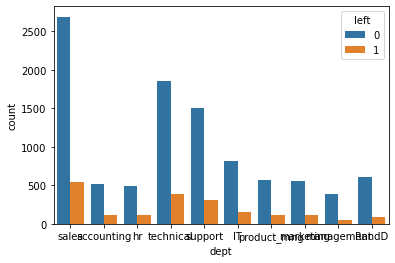

In [ ]:
sns.countplot(x='dept', data=df, hue='left')

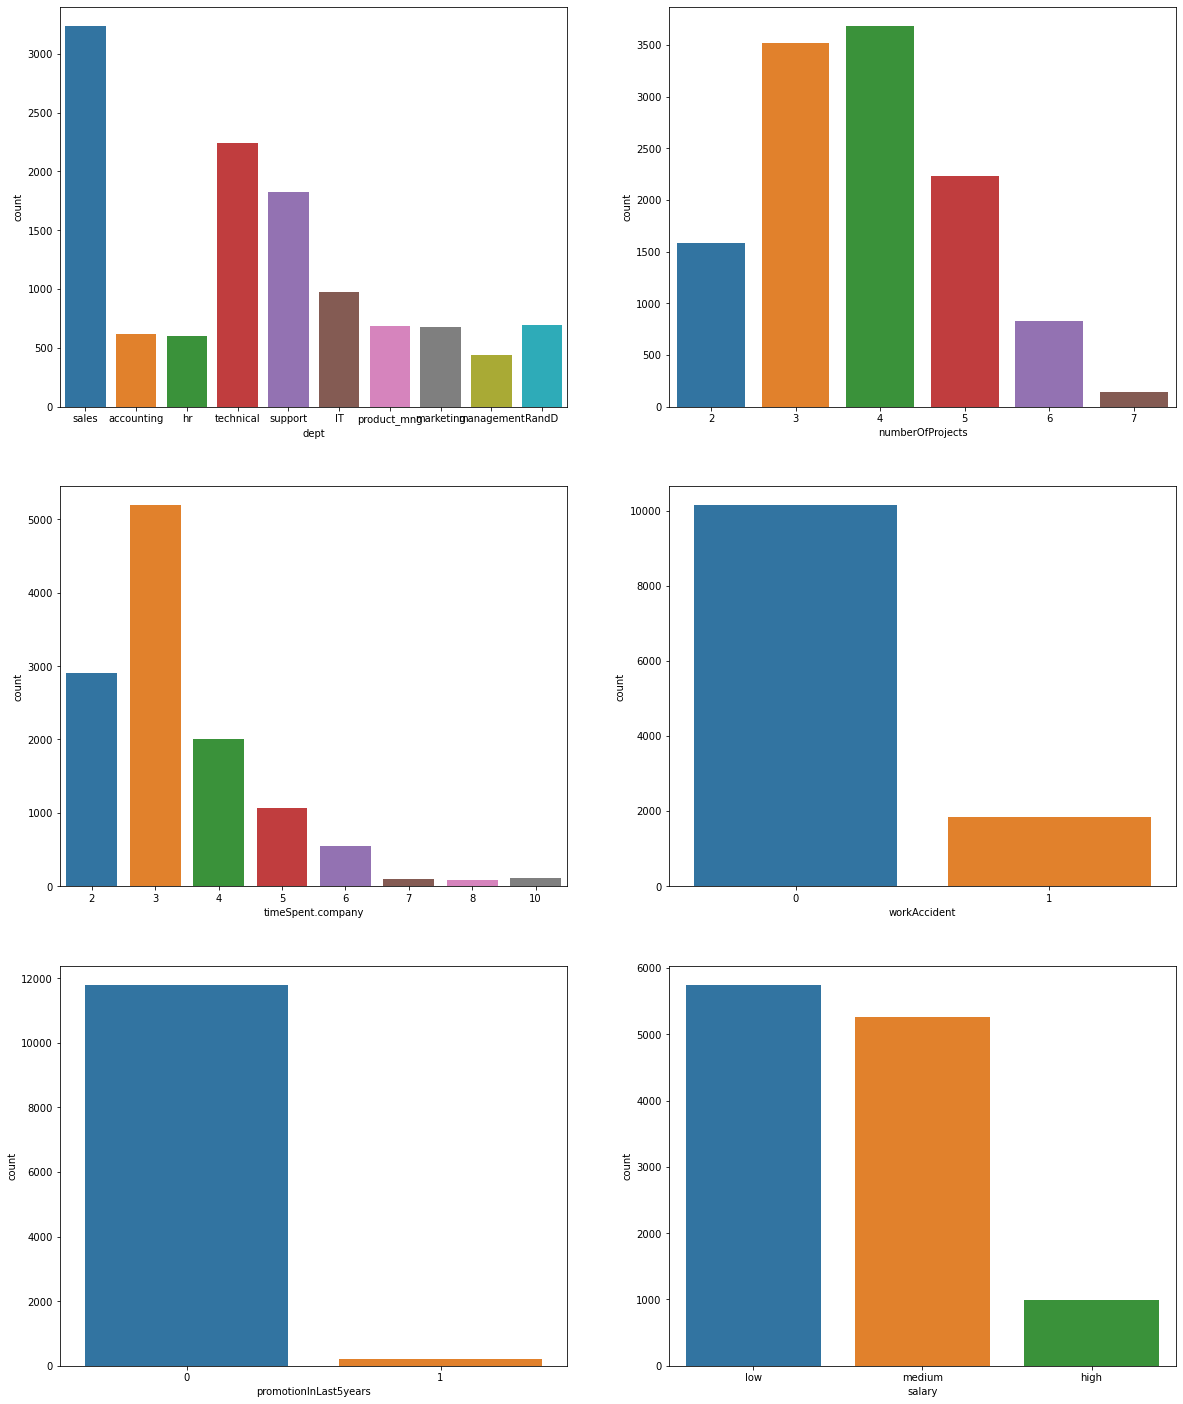

In [ ]:
fig = plt.subplots(figsize=(20,25))

for i,j in enumerate(a):

    plt.subplot(3,2,i+1) #3,2,1 --> 3,2,2
    sns.countplot(x=j, data=df)

plt.show()

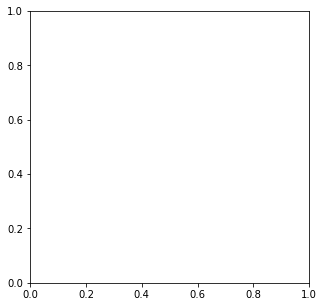

In [ ]:
fig = plt.subplots(figsize=(5,5))

0 dept
1 numberOfProjects
2 timeSpent.company
3 workAccident
4 promotionInLast5years
5 salary


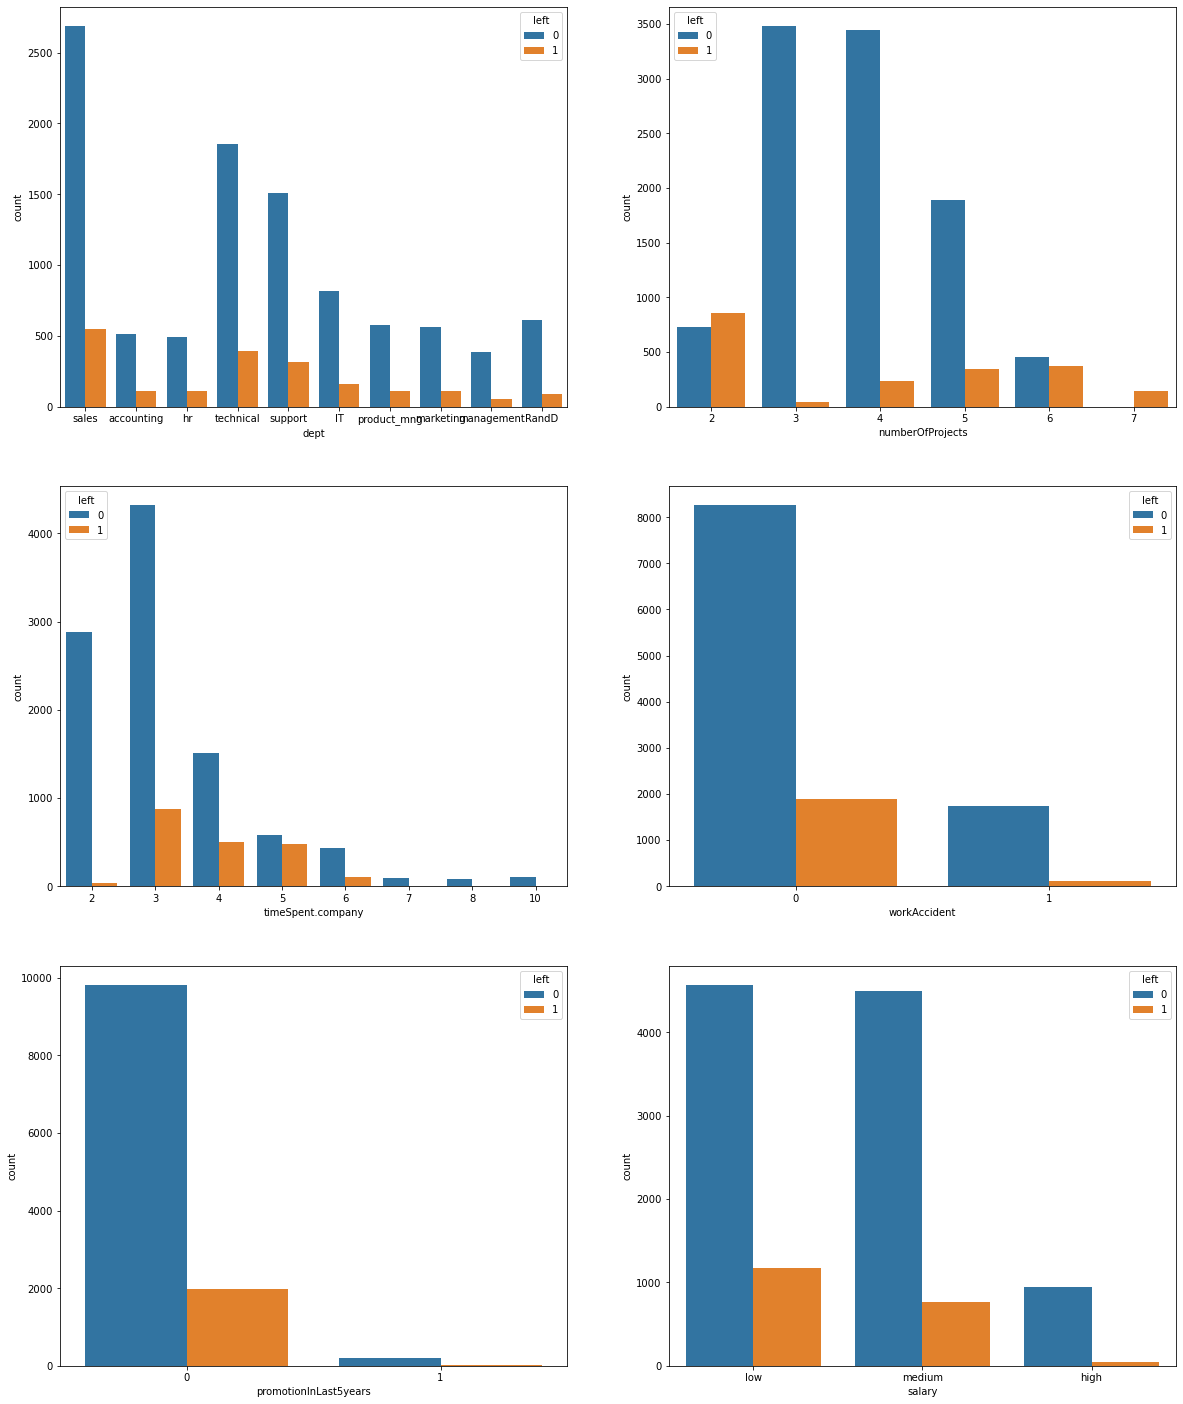

In [ ]:
fig = plt.subplots(figsize = (20,25))

#for i in a:
#    print(i)

for i,j in enumerate(a):
    print(i,j)
    #i-> index values
    #j -> Data
    #i=0, j=Dept ......i=1, numberOfProjects.....
    plt.subplot(3,2,i+1)
    #(3,2,1), (3,2,2), ............
    sns.countplot(x=j, data=df, hue='left') #unique categories and their count

plt.show()

In [ ]:
#Conclusion :

#Dept: Sales, Support, Technical : depts are having the high attrition rate
    # -> Incentives, Increments, training

#Projects -> Employees are leaving when they either have highest or lowest no.of projects
    # -> 3, 4 is the optimal no.of projects

#Time spent -> 3-5 years is the most crucial time for the company
    #-> Increment, Annual Incentives, Promotions

#Work Accident -> Most of the employees who are leaving, are not invloved in any work accident
    # Work accident and attrition rate are not related

#Promotion in last 5 years -> MOst of the employees who are leaving the company haven't been promoted in last 5 years

#Salary -> Most of the employees who are leaving are from the company are of range low and medium salaries.